In [86]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [87]:
iris = load_iris()
X, y = iris.data, iris.target

In [88]:
import scipy
scipy.stats.describe(iris.data[:,:5])

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

In [89]:
np.bincount(iris.target)

array([50, 50, 50])

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,
random_state=0)

In [91]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

[Text(0.4, 0.9, 'X[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.2, 0.5, 'X[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'X[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'X[3] <= 1.75\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'X[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

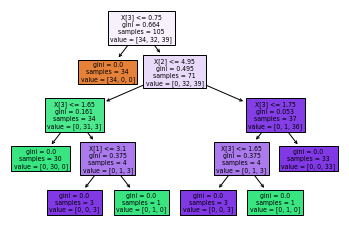

In [92]:
import matplotlib
tree.plot_tree(clf, filled=True)

In [93]:
clf.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [94]:
clf.score(X_test, y_test)

0.9777777777777777

In [95]:
clf = tree.DecisionTreeClassifier(max_depth = 3)

[Text(0.4, 0.875, 'X[2] <= 2.6\ngini = 0.654\nsamples = 45\nvalue = [16, 18, 11]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 16\nvalue = [16, 0, 0]'),
 Text(0.6, 0.625, 'X[3] <= 1.7\ngini = 0.471\nsamples = 29\nvalue = [0, 18, 11]'),
 Text(0.4, 0.375, 'X[2] <= 5.35\ngini = 0.1\nsamples = 19\nvalue = [0, 18, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 18\nvalue = [0, 18, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]')]

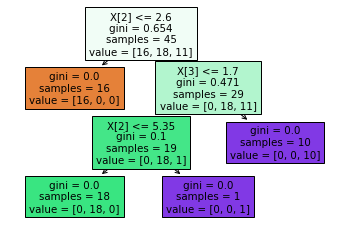

In [96]:
clf.fit(X_test, y_test)
tree.plot_tree(clf, filled=True)

In [97]:
clf.score(X_test, y_test)

1.0

In [98]:
clf = tree.DecisionTreeClassifier(min_samples_leaf = 20)

[Text(0.5, 0.75, 'X[3] <= 1.25\ngini = 0.654\nsamples = 45\nvalue = [16, 18, 11]'),
 Text(0.25, 0.25, 'gini = 0.363\nsamples = 21\nvalue = [16, 5, 0]'),
 Text(0.75, 0.25, 'gini = 0.497\nsamples = 24\nvalue = [0, 13, 11]')]

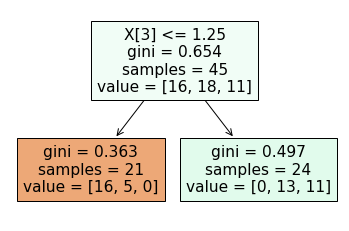

In [99]:
clf.fit(X_test, y_test)
tree.plot_tree(clf, filled=True)

In [100]:
clf.score(X_test, y_test)

0.6444444444444445

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, 
random_state=0)

In [102]:
1-clf.score(X_test, y_test)

0.43356643356643354

In [140]:
from sklearn.model_selection import GridSearchCV
params_dt = {
'max_depth': [3, 4,5, 6],
'min_samples_leaf': [30,40,50]
}

In [141]:
grid_dt = GridSearchCV(estimator=clf,
param_grid=params_dt,
scoring='accuracy',
cv=3,
n_jobs=-1)

In [143]:
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)

{'max_depth': 3, 'min_samples_leaf': 30}


/home/etudiant/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [145]:
clf = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=30)

[Text(0.4, 0.8333333333333334, 'X[2] <= 2.45\ngini = 0.666\nsamples = 143\nvalue = [46, 49, 48]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 97\nvalue = [0, 49, 48]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.171\nsamples = 53\nvalue = [0, 48, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.044\nsamples = 44\nvalue = [0, 1, 43]')]

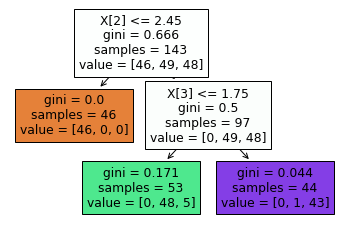

In [146]:
clf.fit(X_test, y_test)
tree.plot_tree(clf, filled=True)

In [147]:
clf.score(X_test, y_test)

0.958041958041958

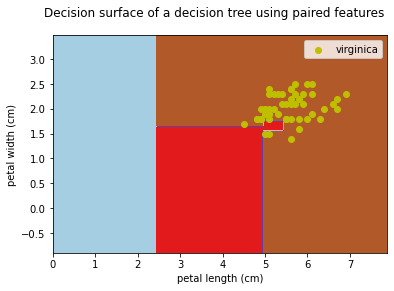

In [149]:
import numpy as np
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [2, 3]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

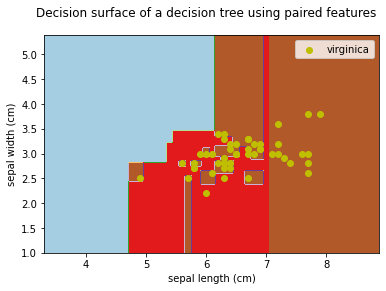

In [150]:
import numpy as np
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [0, 1]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

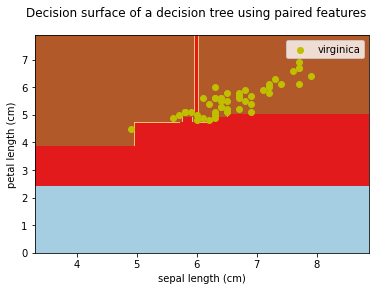

In [151]:
import numpy as np
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [0, 2]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

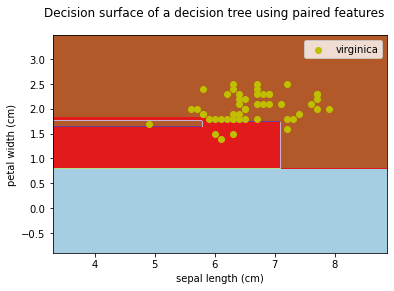

In [152]:
import numpy as np
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [0, 3]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

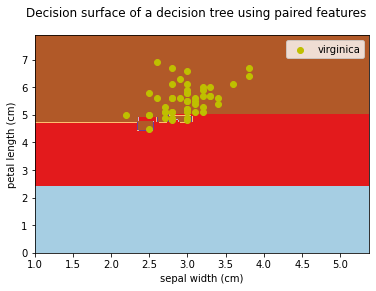

In [153]:
import numpy as np
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [1, 2]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

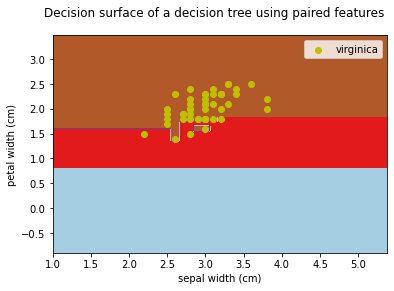

In [154]:
import numpy as np
import matplotlib.pyplot as plt
# Paramètres
n_classes = 3
plot_colors = "bry" # blue-red-yellow
plot_step = 0.02
# Choisir les attributs longueur et largeur des pétales
pair = [1, 3]
# On ne garde seulement les deux attributs
X = iris.data[:, pair]
y = iris.target
# Apprentissage de l'arbre
clf = tree.DecisionTreeClassifier().fit(X, y)
# Affichage de la surface de décision
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min,
y_max, plot_step))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])
plt.axis("tight")
# Affichage des points d'apprentissage
for i, color in zip(range(n_classes), plot_colors):idx = np.where(y == i)
plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
cmap=plt.cm.Paired)
plt.axis("tight")
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Signal sinusoïdal bruité')

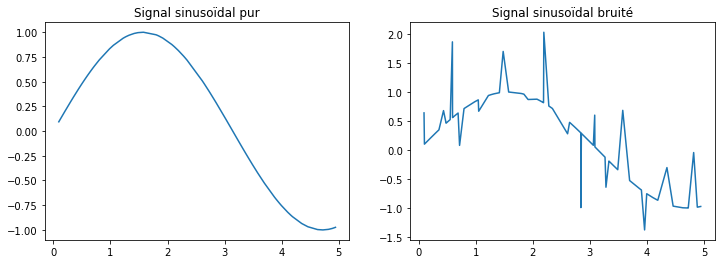

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")
# On ajoute un bruit aléatoire tous les 5 échantillons
y[::5] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")

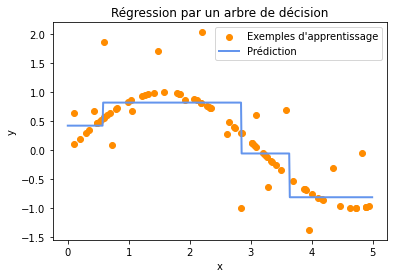

In [157]:
reg = DecisionTreeRegressor(max_depth=2)
reg.fit(X, y)
# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction",
linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

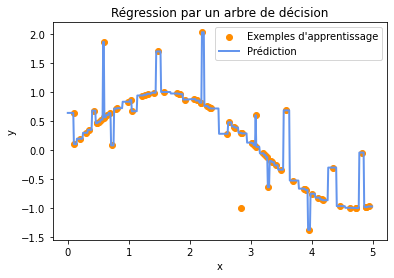

In [158]:
reg = DecisionTreeRegressor(max_depth=15)
reg.fit(X, y)
# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction",
linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

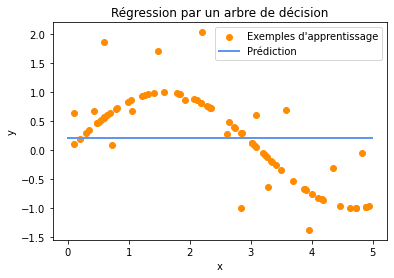

In [159]:
reg = DecisionTreeRegressor(max_depth=0.5)
reg.fit(X, y)
# Prédiction sur la même plage de valeurs
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = reg.predict(X_test)
# Affichage des résultats
plt.figure()
plt.scatter(X, y, c="darkorange", label="Exemples d'apprentissage")
plt.plot(X_test, y_pred, color="cornflowerblue", label="Prédiction",
linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Régression par un arbre de décision")
plt.legend()
plt.show()

ValueError: operands could not be broadcast together with shapes (4,) (16,) (4,) 

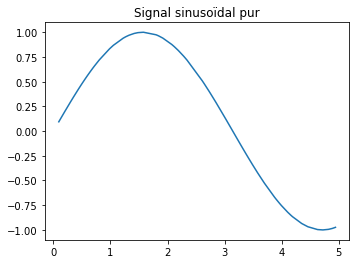

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# Créer les données d'apprentissage
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
fig = plt.figure(figsize=(12, 4))
fig.add_subplot(121)
plt.plot(X, y)
plt.title("Signal sinusoïdal pur")
# On ajoute un bruit aléatoire tous les 5 échantillons
y[::20] += 3 * (0.5 - np.random.rand(16))
fig.add_subplot(122)
plt.plot(X, y)
plt.title("Signal sinusoïdal bruité")